# <center>Análisis exploratorio de ventas totales en supermercados argentinos</center>

## Objetivo
El objetivo de este análisis exploratorio es:
1. Conocer las variables que conforman el dataset.
2. Buscar si existen valores nulos o datos faltantes. 
3. Visualizar los datos en busqueda de patrones.
4. Crear automatizaciones a partir las variables seleccionadas. 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("ventas-totales-supermercados-2.csv")
df.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,2017-01-01,27858.872083,27477.307666,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,340777.38815,4.397544e+06,772371.84765,1.838507e+06,2.806660e+06
1,2017-02-01,25994.200168,25223.428860,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,328288.69508,4.053284e+06,672290.51653,1.257662e+06,2.354085e+06
2,2017-03-01,27780.006522,26334.263640,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,353335.15476,4.354198e+06,667696.66531,1.305675e+06,2.266189e+06
3,2017-04-01,29134.272221,27045.884463,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,359694.45374,4.355707e+06,838948.24575,1.535726e+06,2.146756e+06
4,2017-05-01,27969.004677,25631.863992,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,336568.00849,4.206102e+06,915895.14981,1.824462e+06,2.117971e+06


In [ ]:
df.tail()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
101,2025-06-01,2.009502e+06,22333.231264,2.009502e+09,1.949404e+09,6.009846e+07,2.009502e+09,3.137007e+08,5.456914e+08,9.175278e+08,...,5.607850e+08,8.567248e+07,2.335152e+08,2.596754e+08,7.904793e+07,2.234447e+07,2.601926e+08,6.977926e+07,9.665882e+07,1.374482e+08
102,2025-07-01,2.059033e+06,22539.490962,2.059033e+09,1.993847e+09,6.518622e+07,2.059033e+09,3.235382e+08,7.593238e+08,7.303844e+08,...,5.805209e+08,8.963602e+07,2.370890e+08,2.657613e+08,8.509655e+07,2.369973e+07,2.629786e+08,5.934623e+07,9.324292e+07,1.500661e+08
103,2025-08-01,2.106921e+06,22701.491524,2.106921e+09,2.037396e+09,6.952486e+07,2.106921e+09,3.275998e+08,5.473536e+08,9.507049e+08,...,5.857148e+08,9.338029e+07,2.485876e+08,2.733908e+08,9.192586e+07,2.430100e+07,2.731432e+08,4.843474e+07,8.354485e+07,1.638185e+08
104,2025-09-01,1.962363e+06,20762.022809,1.962363e+09,1.894031e+09,6.833194e+07,1.962363e+09,3.179030e+08,5.180720e+08,8.654065e+08,...,5.508112e+08,8.567300e+07,2.359485e+08,2.521781e+08,9.047939e+07,2.286719e+07,2.675014e+08,3.917200e+07,7.372694e+07,1.329499e+08
105,2025-10-01,2.170974e+06,22611.149705,2.170974e+09,2.096207e+09,7.476753e+07,2.170974e+09,3.505421e+08,5.598203e+08,9.755989e+08,...,5.831959e+08,9.322159e+07,2.559382e+08,2.780895e+08,1.016644e+08,2.494445e+07,2.976186e+08,4.267084e+07,9.317128e+07,1.510083e+08


In [ ]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

df['indice_tiempo'].min(), df['indice_tiempo'].max()


(Timestamp('2017-01-01 00:00:00'), Timestamp('2025-10-01 00:00:00'))

### Luego de inspeccionar los datos cargados en el conjunto vemos que los mismos van desde el 01 de enero del 2017 hasta el 01 de octubre de 2025.

### Ahora vamos a calcular la frecuencia con que se actualizan los datos.

In [ ]:
# Calcular frecuencia de actualización.
df['indice_tiempo'].diff().value_counts()


indice_tiempo
31 days    61
30 days    35
28 days     7
29 days     2
Name: count, dtype: int64

## Observando la estructura general del data set. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   indice_tiempo                        106 non-null    datetime64[ns]
 1   ventas_precios_corrientes            106 non-null    float64       
 2   ventas_precios_constantes            106 non-null    float64       
 3   ventas_totales_canal_venta           106 non-null    float64       
 4   salon_ventas                         106 non-null    float64       
 5   canales_on_line                      106 non-null    float64       
 6   ventas_totales_medio_pago            106 non-null    float64       
 7   efectivo                             106 non-null    float64       
 8   tarjetas_debito                      106 non-null    float64       
 9   tarjetas_credito                     106 non-null    float64       
 10  otros_medios  

In [9]:
df.describe()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
count,106,1.060000e+02,106.000000,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,...,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,2021-05-16 21:44:09.056603648,4.868586e+05,24742.220710,4.868586e+08,4.716359e+08,1.522261e+07,4.868586e+08,9.467225e+07,1.405801e+08,2.058753e+08,...,1.336049e+08,1.958825e+07,5.482296e+07,5.695049e+07,2.121680e+07,5.132992e+06,6.712622e+07,1.077331e+07,2.433035e+07,3.453273e+07
min,2017-01-01 00:00:00,2.599420e+04,20588.467376,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,9.522033e+05,3.282887e+05,4.053284e+06,6.676967e+05,1.257662e+06,2.117971e+06
25%,2019-03-08 18:00:00,5.085015e+04,23138.170366,5.085015e+07,4.994734e+07,7.728057e+05,5.085015e+07,1.737013e+07,1.372395e+07,1.798042e+07,...,1.430608e+07,1.923216e+06,5.735583e+06,5.771872e+06,1.611282e+06,4.933024e+05,7.636285e+06,1.257583e+06,2.820664e+06,4.009437e+06
50%,2021-05-16 12:00:00,1.160470e+05,24145.897478,1.160470e+08,1.116539e+08,4.451812e+06,1.160470e+08,3.550996e+07,3.196914e+07,4.181642e+07,...,3.197522e+07,3.861739e+06,1.332725e+07,1.416986e+07,4.075663e+06,9.136678e+05,1.493801e+07,2.875289e+06,8.028762e+06,8.305266e+06
75%,2023-07-24 06:00:00,5.237243e+05,25984.790747,5.237243e+08,5.059108e+08,1.624986e+07,5.237243e+08,1.300310e+08,1.622075e+08,1.904096e+08,...,1.485318e+08,1.946460e+07,5.724800e+07,5.745829e+07,2.205313e+07,5.359817e+06,6.720736e+07,1.149624e+07,3.203674e+07,3.603441e+07
max,2025-10-01 00:00:00,2.228213e+06,34084.519434,2.228213e+09,2.167791e+09,7.476753e+07,2.228213e+09,3.505421e+08,7.593238e+08,9.755989e+08,...,5.857148e+08,9.338029e+07,2.559382e+08,2.780895e+08,1.016644e+08,2.494445e+07,2.976186e+08,6.977926e+07,1.009251e+08,1.817245e+08
std,NaN,6.881350e+05,2449.579480,6.881350e+08,6.664498e+08,2.186020e+07,6.881350e+08,1.095479e+08,1.968283e+08,3.071735e+08,...,1.892173e+08,2.903009e+07,7.912343e+07,8.308353e+07,3.115623e+07,7.595118e+06,9.501425e+07,1.572467e+07,3.106082e+07,4.847344e+07


In [10]:
df.isna().sum().sort_values(ascending=False)


indice_tiempo                          0
ventas_precios_corrientes              0
electronicos_articulos_hogar           0
indumentaria_calzado_textiles_hogar    0
articulos_limpieza_perfumeria          0
alimentos_preparados_rotiseria         0
verduleria_fruteria                    0
carnes                                 0
lacteos                                0
panaderia                              0
almacen                                0
bebidas                                0
subtotal_ventas_alimentos_bebidas      0
ventas_totales_grupo_articulos         0
otros_medios                           0
tarjetas_credito                       0
tarjetas_debito                        0
efectivo                               0
ventas_totales_medio_pago              0
canales_on_line                        0
salon_ventas                           0
ventas_totales_canal_venta             0
ventas_precios_constantes              0
otros                                  0
dtype: int64

### No se detectan valores faltantes en el período analizado.

## Validaciones de los campos del conjunto de datos.
A continuación procedo a validar los datos en la columna Canal de venta y Medios de pago:

### Canal de venta.

In [ ]:
(df['salon_ventas'] + df['canales_on_line'] 
 - df['ventas_totales_canal_venta']).abs().describe()


count    1.060000e+02
mean     2.966175e-08
std      1.005965e-07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.768372e-07
dtype: float64

### Medios de pagos. 

In [ ]:
(df['efectivo'] + df['tarjetas_debito'] + 
 df['tarjetas_credito'] + df['otros_medios']
 - df['ventas_totales_medio_pago']).abs().describe()


count    1.060000e+02
mean     1.144244e-04
std      5.035623e-04
min      0.000000e+00
25%      1.192093e-07
50%      4.768372e-07
75%      2.715737e-06
max      3.001396e-03
dtype: float64

## Evolución temporal
Ahora procedo a analisar la evolución de las ventas y los medios de pago a lo largo de los años. 

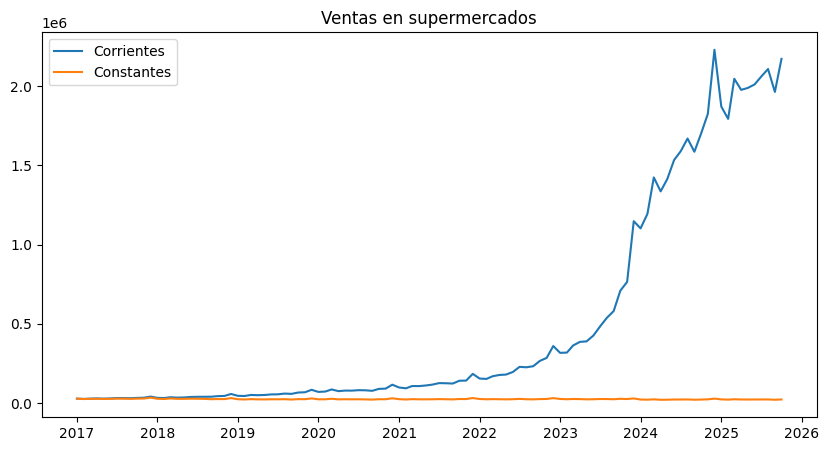

In [14]:
# Gráfico de tendencia de tiempo. 
plt.figure(figsize=(10,5))
plt.plot(df['indice_tiempo'], df['ventas_precios_corrientes'], label='Corrientes')
plt.plot(df['indice_tiempo'], df['ventas_precios_constantes'], label='Constantes')
plt.legend()
plt.title('Ventas en supermercados')
plt.show()


## Análisis por canal de venta

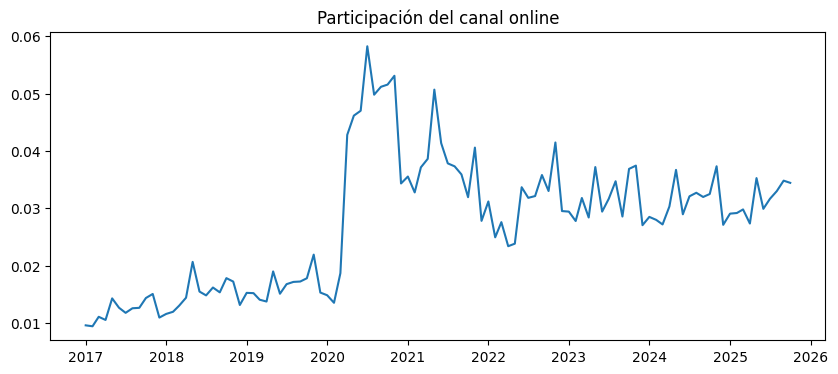

In [15]:
df['share_online'] = df['canales_on_line'] / df['ventas_totales_canal_venta']

plt.figure(figsize=(10,4))
plt.plot(df['indice_tiempo'], df['share_online'])
plt.title('Participación del canal online')
plt.show()


## Medios de pago.

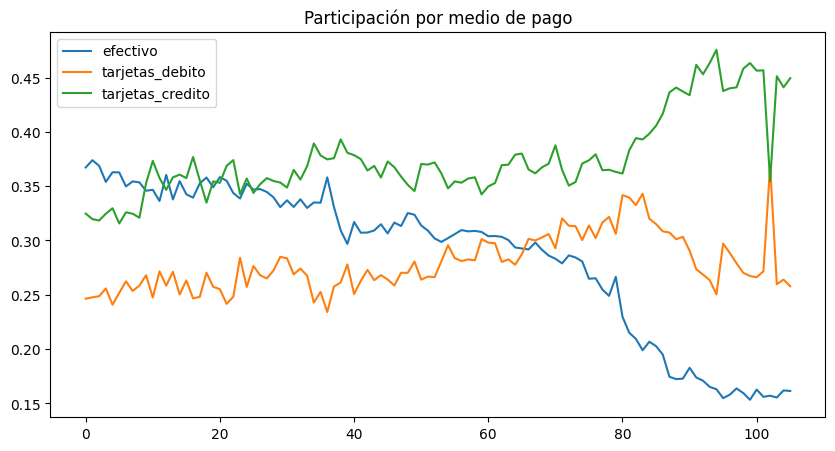

In [16]:
cols_pago = ['efectivo', 'tarjetas_debito', 'tarjetas_credito']

(df[cols_pago]
 .div(df['ventas_totales_medio_pago'], axis=0)
 .plot(figsize=(10,5)))

plt.title('Participación por medio de pago')
plt.show()


## Análisis por grupo de artículos. 

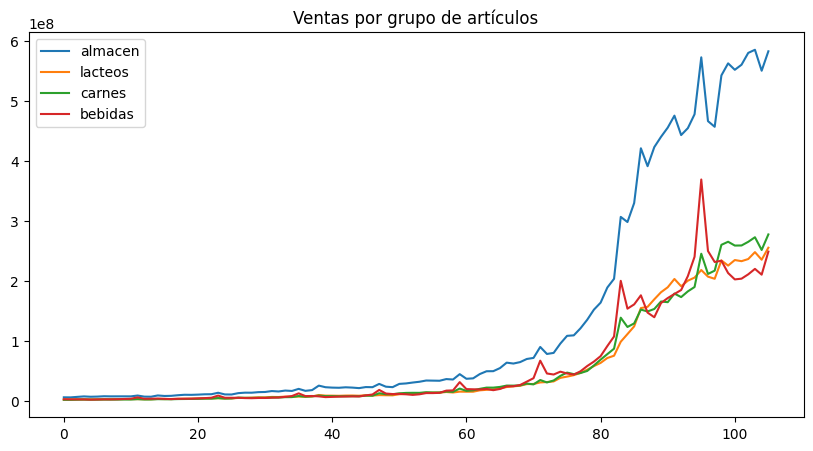

In [17]:
rubros = ['almacen', 'lacteos', 'carnes', 'bebidas']

df[rubros].plot(figsize=(10,5))
plt.title('Ventas por grupo de artículos')
plt.show()


## Análisis por rubro.

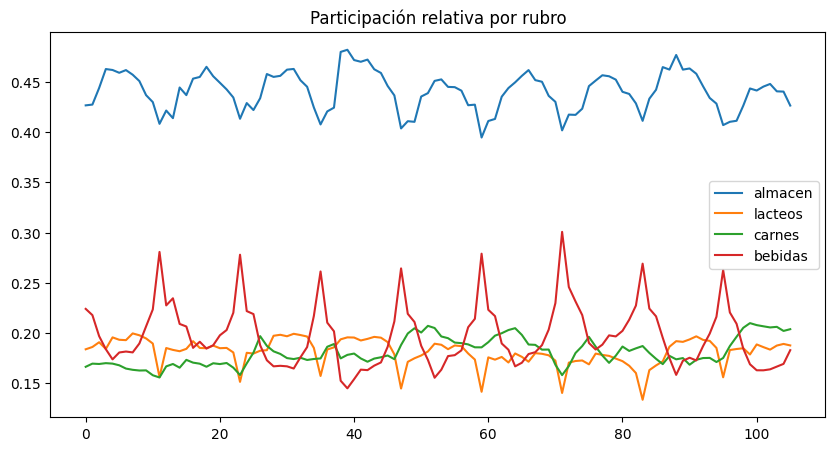

In [18]:
df[rubros].div(df[rubros].sum(axis=1), axis=0).plot(figsize=(10,5))
plt.title('Participación relativa por rubro')
plt.show()


## Estacionalidad. 
Ahora procedo a visualizar las ventas por mes en todo el dataset para observar si existe tendencia y/o estacionalidad. 

<Axes: xlabel='mes', ylabel='ventas_precios_constantes'>

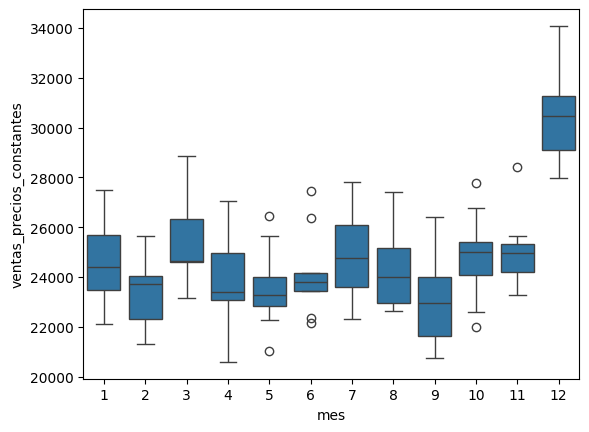

In [20]:
df['mes'] = df['indice_tiempo'].dt.month
sns.boxplot(x='mes', y='ventas_precios_constantes', data=df)


### A partir de esta visualización podemos inferir que Diciembre es el mes con más ventas por año, seguido de Marzo y Julio. También se logra apreciar a junio como el mes con menos movimiento de venta. 